# 1. classification using perceptron

## preparation

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import spacy
#import seaborn as sns
# Load SpaCy's English model
#nlp = spacy.load('en_core_web_sm')

In [4]:
# Sample data
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## exploratory analysis

In [5]:
#print(df.describe())
#print(df.info())

# Check for missing values
print(df.isnull().sum())
print('\n')
# Basic statistics
print(df['sentiment'].describe())

review       0
sentiment    0
dtype: int64


count        50000
unique           2
top       positive
freq         25000
Name: sentiment, dtype: object


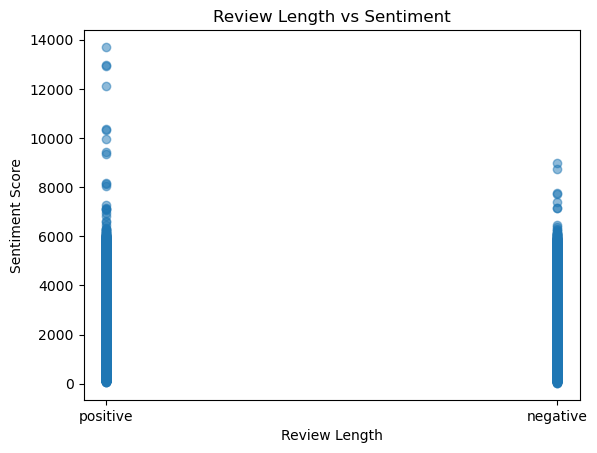

In [6]:
# Calculating the length of each review
df['review_length'] = df['review'].apply(len)

# Plotting review length vs sentiment
plt.scatter(df['sentiment'], df['review_length'], alpha=0.5)
plt.title('Review Length vs Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()

In [8]:
print(df.describe())
print(df.info())

       review_length   sentiment_n
count   50000.000000  50000.000000
mean     1309.431020      0.500000
std       989.728014      0.500005
min        32.000000      0.000000
25%       699.000000      0.000000
50%       970.000000      0.500000
75%      1590.250000      1.000000
max     13704.000000      1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         50000 non-null  object
 1   sentiment      50000 non-null  object
 2   review_length  50000 non-null  int64 
 3   sentiment_n    50000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB
None


In [9]:
df['sentiment_n'] = df['sentiment'].replace({'negative': 0, 'positive': 1})
df['sentiment_n'].value_counts()

sentiment_n
1    25000
0    25000
Name: count, dtype: int64

## extract the reviews and the sentiment

In [12]:
reviews = df['review'].values
sentiments = df['sentiment'].values
reviews[0], sentiments[0]

("One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

### alternative train, test split

In [13]:
# Prepare your data from pandas
train_df = df.sample(frac=.8, random_state=16).reset_index(drop=True)
X_train, y_train = train_df['review'], train_df['sentiment']

test_df = df.drop(train_df.index).reset_index(drop=True)
X_test, y_test = test_df['review'], test_df['sentiment']

## preprocess texts
Using SpaCy takes too long

def preprocess_text_spacy(text):
    # Process the text with SpaCy
    doc = nlp(text)
    # Tokenization and Lemmatization
    lemmatized = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic tokens
    lemmatized = [word for word in lemmatized if word.isalpha() and not nlp.vocab[word].is_stop]
    # Return the preprocessed text
    return ' '.join(lemmatized)
# test for small data
small_df=df.head()
small_df['review'].apply(preprocess_text_spacy) 

#df['preprocessed_reviews'] = df['review'].apply(preprocess_text) 
#preprocessed_text=[preprocess_text_spacy(review) for review in reviews]

### use nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  
# from nltk.stem import WordNetLemmatizer  
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

def preprocess_text_nltk(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Stemming (or you can use Lemmatization)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Combine words back into string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

#df['preprocessed_reviews'] = df['review'].apply(preprocess_text_nltk) 
#preprocessed_text=[preprocess_text_nltk(review) for review in reviews]

### Unfortunately, preprocessed text yields worse results.
### CountVectorizer does the preprocessing (tokenization, removing stopwords)

## Convert text data into numerical data using Unigram

In [14]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)
#X = vectorizer.fit_transform(prepreocessed_text)

## Split the data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, 
                                                    random_state=16)

In [16]:
X_train.shape

(40000, 101895)

## Initialize the Perceptron, train, & predict

In [17]:
clf = Perceptron()

# Train the Perceptron
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8734
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.92      0.88      4983
    positive       0.91      0.83      0.87      5017

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



### Tfidf Vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(reviews)
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, 
                                                    random_state=16)
clf = Perceptron()

# Train the Perceptron
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.881
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.89      0.88      4983
    positive       0.89      0.87      0.88      5017

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Bigram

In [17]:
# Using CountVectorizer with bigrams
bi_vectorizer = CountVectorizer(ngram_range=(1, 2))  # (1, 2) means unigrams and bigrams
X2 = bi_vectorizer.fit_transform(reviews)
X_train, X_test, y_train, y_test = train_test_split(X2, sentiments, test_size=0.2, 
                                                    random_state=16)
clf2 = Perceptron()

# Train the Perceptron
clf2.fit(X_train, y_train)

# Make predictions
predictions = clf2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9036
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.90      0.90      4983
    positive       0.90      0.90      0.90      5017

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### tfidf

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(reviews)
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, 
                                                    random_state=16)
clf = Perceptron()

# Train the Perceptron
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9075
Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.89      0.91      4983
    positive       0.90      0.92      0.91      5017

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Tri-grams

In [25]:
# Using CountVectorizer with trigrams
tri_vectorizer = CountVectorizer(ngram_range=(1, 3))  # (1, 2) means unigrams and bigrams
X3 = tri_vectorizer.fit_transform(reviews)
X_train, X_test, y_train, y_test = train_test_split(X3, sentiments, test_size=0.2, 
                                                    random_state=16)
clf3 = Perceptron()

# Train the Perceptron
clf3.fit(X_train, y_train)

# Make predictions
predictions = clf3.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.905
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4983
    positive       0.90      0.92      0.91      5017

    accuracy                           0.91     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.91      0.90     10000



In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(reviews)
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, 
                                                    random_state=16)
clf = Perceptron()

# Train the Perceptron
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9061
Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.89      0.90      4983
    positive       0.89      0.93      0.91      5017

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## 4-grams

In [26]:
q_vectorizer = CountVectorizer(ngram_range=(1, 4))  # (1, 2) means unigrams and bigrams
X4 = q_vectorizer.fit_transform(reviews)
X_train, X_test, y_train, y_test = train_test_split(X4, sentiments, test_size=0.2, 
                                                    random_state=16)
clf4 = Perceptron()

# Train the Perceptron
clf4.fit(X_train, y_train)

# Make predictions
predictions = clf4.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9043
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4983
    positive       0.90      0.92      0.91      5017

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### tfidf

In [19]:
vectorizer = TfidfVectorizer(ngram_range=(1, 4))
X = vectorizer.fit_transform(reviews)
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, 
                                                    random_state=16)
clf = Perceptron()

# Train the Perceptron
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9103
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.92      0.91      4983
    positive       0.91      0.91      0.91      5017

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# 2. use logistic regression for sentiment analysis

In [20]:
reviews = df['review'].values
sentiments = df['sentiment'].values

## Vectorization with TF-IDF as feature

### 1. uni-gram

In [21]:
vectorizer = CountVectorizer()#stop_words=stopwords.words('english'), preprocessor=preprocess_text)
# unigram
vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(reviews)
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, 
                                                    random_state=16)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## train logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

c:\Users\KWan\anaconda3\envs\llmw\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8907
Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.89      0.89      4983
    positive       0.89      0.89      0.89      5017

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



#### tfidf

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()#stop_words=stopwords.words('english'), preprocessor=preprocess_text)
#X = vectorizer.fit_transform(reviews)
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, 
                                                    random_state=16)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## train logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Make predictions
predictions = clf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9011
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4983
    positive       0.90      0.91      0.90      5017

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Bi-grams

In [23]:
# countvectorizer with bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(reviews)
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, 
                                                    random_state=16)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## train logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

c:\Users\KWan\anaconda3\envs\llmw\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9093
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.90      0.91      4983
    positive       0.91      0.91      0.91      5017

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#### tfidf

In [26]:
vectorizer2 = TfidfVectorizer(ngram_range=(1, 2))#stop_words=stopwords.words('english'), preprocessor=preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, 
                                                    random_state=16)
X_train_tfidf = vectorizer2.fit_transform(X_train)
X_test_tfidf = vectorizer2.transform(X_test)

## train logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Make predictions
predictions = clf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

c:\Users\KWan\anaconda3\envs\llmw\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8995
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4983
    positive       0.89      0.91      0.90      5017

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### tri-gram

In [27]:
# countvectorizer with trigrams
vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(reviews)
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, 
                                                    random_state=16)
#X_train = vectorizer.fit_transform(X_train)
#X_test = vectorizer.transform(X_test)

## train logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

c:\Users\KWan\anaconda3\envs\llmw\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9103
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.91      0.91      4983
    positive       0.91      0.92      0.91      5017

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#### tfidf

In [28]:
vectorizer2 = TfidfVectorizer(ngram_range=(1, 3))#stop_words=stopwords.words('english'), preprocessor=preprocess_text)

X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, 
                                                    random_state=16)
X_train_tfidf = vectorizer2.fit_transform(X_train)
X_test_tfidf = vectorizer2.transform(X_test)

## train logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Make predictions
predictions = clf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8918
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4983
    positive       0.88      0.91      0.89      5017

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# 3. industry-strength solution using HuggingFace's pipeline

In [30]:
import transformers
# import pipeline
from transformers import pipeline
from transformers import AutoTokenizer

reviews = df['review'].values
sentiments = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, 
                                                    random_state=16)
# Sentiment Analysis Pipeline using bert
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
pipe= pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [31]:
pipe(df['review'][0:5].tolist())

[{'label': 'NEGATIVE', 'score': 0.5121204853057861},
 {'label': 'POSITIVE', 'score': 0.9993765950202942},
 {'label': 'POSITIVE', 'score': 0.9991896748542786},
 {'label': 'NEGATIVE', 'score': 0.9991722106933594},
 {'label': 'POSITIVE', 'score': 0.9988238215446472}]

In [32]:
# use distilbert finetuned as the model.
model='distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = AutoTokenizer.from_pretrained(model)
pipe= pipeline('sentiment-analysis', tokenizer=tokenizer, model=model)
pipe(df['review'][0:5].tolist())

In [35]:
#pipe(df['review'].tolist()) 
# pipeline does not work because some review are longer than 512 tokens

In [37]:
long_reviews=[review for review in reviews if len(review.split())>512]
len(long_reviews)

3694

In [41]:
long_reviews[0]

'"The Cell" is an exotic masterpiece, a dizzying trip into not only the vast mind of a serial killer, but also into one of a very talented director. This is conclusive evidence of what can be achieved if human beings unleash their uninhibited imaginations. This is boldness at work, pushing aside thoughts to fall into formulas and cliches and creating something truly magnificent. This is the best movie of the year to date.<br /><br />I\'ve read numerous complaints about this film, anywhere from all style and no substance to poorly cast characters and bad acting. To negatively criticize this film is to miss the point. This movie may be a landmark, a tradition where future movies will hopefully follow. "The Cell" has just opened the door to another world of imagination. So can we slam the door in its face and tell it and its director Tarsem Singh that we don\'t want any more? Personally, I would more than welcome another movie by Tarsem, and would love to see someone try to challenge him.

## 1. truncate long reviews

In [57]:
pipe = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, truncation=True, padding=True)
pred_sentiments=pipe(X_test.tolist())

### change sentiment strings to values

In [69]:
y_test = [1 if sentiment == 'positive' else 0 for sentiment in y_test]
preds=[pred['label'].lower() for pred in pred_sentiments]
preds=[1 if sentiment == 'positive' else 0 for sentiment in preds]
#df['sentiment'] = df['sentiment'].replace({'negative': 0, 'positive': 1})

### sklearn metrics

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8935
Precision: 0.9153005464480874
Recall: 0.8680486346422165
F1 Score: 0.8910485933503837
ROC AUC Score: 0.8935868298637534


In [ ]:
## 2. treat overflowed samples

In [52]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def sentiment_analysis_with_overflow(text, stride=50, max_length=512):
    """ This function treats overflowed text as separate examples"""
    # Tokenize with overflow
    tokenized_input = tokenizer(
        text, 
        truncation=True, 
        max_length=max_length, 
        stride=stride, 
        return_overflowing_tokens=True, 
        return_tensors="pt"
    )

    # Filter out unnecessary items for model
    input_ids = tokenized_input["input_ids"]
    attention_mask = tokenized_input["attention_mask"]

    # Initialize list to store predictions
    predictions = []

    # Process each chunk
    for i in range(input_ids.shape[0]): # input_ids.shape[0] = number of chunks after tokenization
        outputs = model(input_ids[i].unsqueeze(0), attention_mask=attention_mask[i].unsqueeze(0))
        prediction = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predictions.append(prediction)

    # Convert list of tensors to a single tensor
    predictions = torch.cat(predictions, dim=0)

    # Aggregate results (here, just taking the mean)
    return predictions.mean(dim=0)

# Example usage
review = "Your very long text goes here..."
reviews = [["Your very long text goes here...", "I love this movie!"]]
result = sentiment_analysis_with_overflow(review)
print(result)

tensor([0.9870, 0.0130], grad_fn=<MeanBackward1>)


In [51]:
sentiment_analysis_with_overflow([long_reviews])

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]